#NESC 4177 Neurocomputing Project 1


###Problem a Instructions
	

Write a program that solves the initial value problem of the ordinary differential equation (ODE) dx/dt = -x+t for x(0)=10. Plot the solution and write an explanation of each line of your program.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


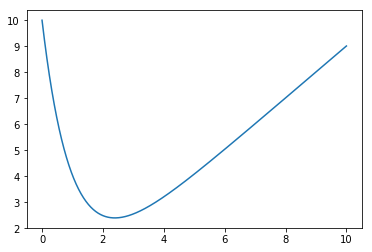

In [ ]:
def problem1():
  #import the high performance vector and matrix library
  import numpy as np

  #function x(t)'s' domain
  domain = [0,10]

  """
  Because we are dealing with numerical integration, we need to discretize the 
  domain of the function x. This value represents the distance between 2 points 
  in the domain of x
  """
  t_step = 0.01

  #values on which we are going to evaluate the function x
  x_domain = np.linspace(domain[0], domain[1], (domain[1]-domain[0])/t_step)

  #range values of the function x
  x = np.zeros(len(x_domain))

  #keeps track of the current iteration of the integration
  index = 0

  for t in x_domain:
    """
    This loop is invoked for every value in the domain of x
    """
    if t == 0:
      #This is the initial condition case
      x[index] = 10
    else:
      #Let's approximate the value of the derivative and use to integrate x
      x[index] = x[index-1] + t_step * (-1*x[index-1] + t)
    index = index + 1

  #Import plotting library
  from matplotlib import pyplot as plt

  #Let's plot the integrated function x over the requested domain
  plt.plot(x_domain, x)
  
problem1()

###Problem b Instructions

Write a program integrate an Izhikevich neuron and reproduce Figures 2.4a-c of the manuscript. Explain each line in the program. Note that the reset condition should read u(v>30) = u+d.

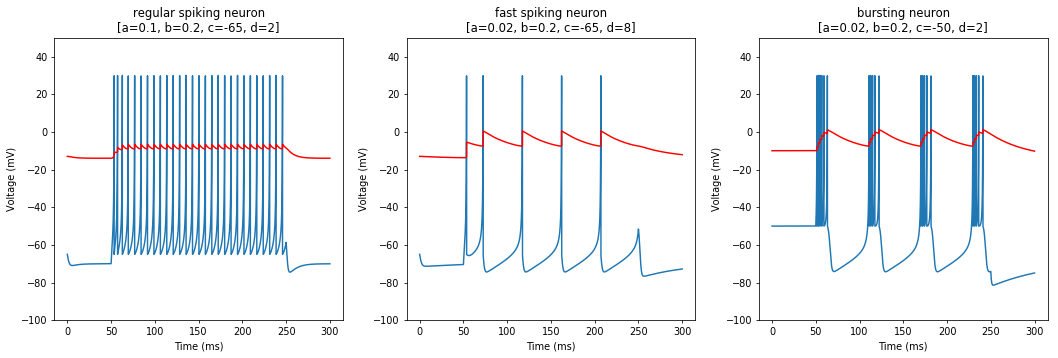

In [ ]:
def problem2():
  """
  This function ensures that variable and imports for this problem is name 
  spaced and information from previous cells doesn't leak
  """
  
  #Import numpy for high performance vector and matrix operations
  import numpy as np
  
  #Model parameters for the 3 scenarios
  a = np.array([0.1, 0.02, 0.02])
  b = np.array([0.2, 0.2, 0.2])
  c = np.array([-65, -65, -50])
  d = np.array([2, 8, 2])

  neurons_count = len(a)

  #Simulation duration
  duration=300
  
  #Threshold of spiking
  threshold=30
  
  def pulse_current(t):
    """
    Define a pulse from 50 ms to 250 ms
    """
    if t >= 50 and t <= 250:
      return 10
    else:
      return 0

  #stores the time at which the neuron was simulated
  t = [0]
  
  #Amount of time between two time points in the simulation
  delta_t = 0.001

  #stores the membrane potential, rows for each neuron, column for each point in time
  potential = [[] for t in range(int(duration/delta_t))]

  #store the the recovery variable, rows for each neuron, column for each point in time
  recovery = [[] for t in range(int(duration/delta_t))]
  
  #Values at the begining of time
  potential[0] = v = c
  recovery[0] = u = b*c
  
  # Stores the current injected at time t
  i = []
  
  #Iteration index
  index = 1
  
  for t_step in np.arange(delta_t, duration, step=delta_t):
    """
    At every step we are going to calculate the membrane potential and check 
    whether or not a spike occured.
    """

    #store the time as it elapses
    t.append(t_step)

    #evaluate the current at the time step
    injected_current = pulse_current(t_step)
    
    #Which neuron did spike?
    firing = v>=threshold

    #Update the neuron that fired
    v[firing]=c[firing]
    u[firing]=u[firing]+d[firing]

    #Integrate the membrane potential
    delta_v = delta_t * (0.04 * np.power(v,2) + 5*v + 140 - u + injected_current)
    
    #Integrate the recovery variable
    delta_u = delta_t * a*(b*v-u)

    v = v + delta_v
    u = u + delta_u

    #Store values of this iteration
    i.append(injected_current)
    potential[index]=v
    recovery[index]=u
    
    #prepare for next iteration
    index = index + 1

  #Time to plot the results
  
  #Import plotting libraries
  import matplotlib.pyplot as plt
  from matplotlib.pyplot import figure

  #Define plotting informaiton
  title = ["regular spiking neuron", "fast spiking neuron", "bursting neuron"]

  #Create 3 side by side plots
  fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15, 5), dpi=70, facecolor='w', edgecolor='k')

  #plot every model in its own subplot
  for i in range(neurons_count):
    #declare a meainingful title and axis labels
    axs[i].set_title(f"{title[i]}\n[a={a[i]}, b={b[i]}, c={c[i]}, d={d[i]}]")
    axs[i].set_xlabel("Time (ms)")
    axs[i].set_ylabel("Voltage (mV)")
    #set a consistent limit on the y axis
    axs[i].set_ylim(bottom=-100,top=50)
    axs[i].plot(t, np.array(potential)[:,i])
    axs[i].plot(t, np.array(recovery)[:,i], color="red")

problem2()

###Problem 3 instructions
Try to reproduce Figure 3.18 and explain your experiment.

###Solution
In this experiment, Instead of using a noisy current, I experimented with using a non noisy current. The simultated on the other hands are using random parameters where 
- a ~ N(0.02, 1)
- b ~ N(0.2, 1)
- c ~ N(-65, 1)
- d ~ N(8, 1)

The mean of the parameters is that of a fast spiking neuron. The hypothesis is that, the average firing rate of the population can still be approximated using a leaky integrate-and-fire neuron.

In [ ]:
def problem3():
  """
  This function ensures that variable and imports for this problem is name 
  spaced and information from previous cells doesn't leak
  """
  
  #Import numpy for high performance vector and matrix operations
  import numpy as np
  
  #Number of neurons in the population
  population_count = 1000
  
  #Model parameters for the 3 scenarios
  a = np.random.normal(0.02,1, population_count)
  b = np.random.normal(0.2, 1, population_count)
  c = np.random.normal(-65, 1, population_count)
  d = np.random.normal(8, 1, population_count)

  #Simulation duration
  duration=300
  
  #Threshold of spiking
  threshold=30
  
  def pulse_current(t):
    """
    Define a pulse from 50 ms to 250 ms
    """
    if t >= 50 and t <= 250:
      return 10
    else:
      return 0

  #stores the time at which the neuron was simulated
  t = [0]
  
  #Amount of time between two time points in the simulation
  delta_t = 0.001

  #stores the membrane potential, rows for each neuron, column for each point in time
  potential = [[] for t in range(int(duration/delta_t))]

  #store the the recovery variable, rows for each neuron, column for each point in time
  recovery = [[] for t in range(int(duration/delta_t))]
  
  #Values at the begining of time
  potential[0] = v = c
  recovery[0] = u = b*c
  
  # Stores the current injected at time t
  i = []
  
  #Iteration index
  index = 1
  
  for t_step in np.arange(delta_t, duration, step=delta_t):
    """
    At every step we are going to calculate the membrane potential and check 
    whether or not a spike occured.
    """

    #store the time as it elapses
    t.append(t_step)

    #evaluate the current at the time step
    injected_current = pulse_current(t_step)
    
    #Which neuron did spike?
    firing = v>=threshold

    #Update the neuron that fired
    v[firing]=c[firing]
    u[firing]=u[firing]+d[firing]

    #Integrate the membrane potential
    delta_v = delta_t * (0.04 * np.power(v,2) + 5*v + 140 - u + injected_current)
    
    #Integrate the recovery variable
    delta_u = delta_t * a*(b*v-u)

    v = v + delta_v
    u = u + delta_u

    #Store values of this iteration
    i.append(injected_current)
    potential[index]=v
    recovery[index]=u
    
    #prepare for next iteration
    index = index + 1

  #Time to plot the results
  
  #Import plotting libraries
  import matplotlib.pyplot as plt
  from matplotlib.pyplot import figure

  #Define plotting informaiton
  title = ["regular spiking neuron", "fast spiking neuron", "bursting neuron"]

  #Create 3 side by side plots
  fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15, 5), dpi=70, facecolor='w', edgecolor='k')

  #plot every model in its own subplot
  for i in range(neurons_count):
    #declare a meainingful title and axis labels
    axs[i].set_title(f"{title[i]}\n[a={a[i]}, b={b[i]}, c={c[i]}, d={d[i]}]")
    axs[i].set_xlabel("Time (ms)")
    axs[i].set_ylabel("Voltage (mV)")
    #set a consistent limit on the y axis
    axs[i].set_ylim(bottom=-100,top=50)
    axs[i].plot(t, np.array(potential)[:,i])
    axs[i].plot(t, np.array(recovery)[:,i], color="red")

problem2()


  simulation_duration = 200 #Simulation time in ms

  # delta_t = 0.01 #Time step in ms
  # tau=10 #Membrane time constant

  def step_current(t):
    """
    A function representing the value of the input current at time t, This function simply adds noise to the input current. The noise is a standard normal random variable
    """
    if t < simulation_duration/2:
      return 10
    else:
      return 16


In [ ]:
def leaky_if_neuron(duration: int, input_current, v_rest, delta_t, tao=10, resistance=1):
  #Initial Conditions

  #Since we can't deal with continuous time, let's discretize time
  t = []

  #input potential
  i = []

  #Initial membrane potential
  v = []
  for t_val in np.arange(0, duration, step = delta_t):
    t.append(t_val)
    current = input_current(t_val)
    
    if t_val == 0:
      v.append(v_rest)
      i.append(current)
      continue

    delta_v = delta_t/tao * (-1*(v[-1] - v_rest) + resistance*current)
    v.append(v[-1] + delta_v)
    
  return (t, i, v)

#Now, let's iterate over time and calculcate the potential by integrating the differential equation numerically (Euler Scheme)
def leaky_if_population(duration: int, input_current, theta, u_rest=-65, n=10, tao=10, delta_t=0.01):
  """
  A neuron leaky integrator simulator. It uses a threshold theta of firing and membrane resting potential in addition to an function of the input current at time t
  """

#   T = [] #Time we are simulating in ms
  
  #2D representation of activity
  """
  first dimension is for number of neurons
  second dimension is for time, that way we end up with 
       t 0, 1,2,
  neuron 1
  neuron 2
  .
  .
  .
  neuron n
  where I[n][duration] is for current of all neurons
  """
  
  #Initialize the matrix to simplify indexing, it will take upfront memory but that is no big deal.
  
#   [[] for y in range(n)] #current at a given time in mA

  input_current_noise_level = 200
  
  i = np.zeros([n, int(duration/delta_t)])
  u = np.ones([n, int(duration/delta_t)])*u_rest
  s = np.zeros([n, int(duration/delta_t)])
  
  #u = [[] for y in range(n)] #Membrane potential in mV
  #s = [[] for y in range(n)] #Whether or not the neuron fired
  time = []

  time_step = 0
  for t in np.arange(0,duration, step=delta_t):
    time.append(t)
       
    if t == 0:
      #Initial state
      current = np.random.normal(input_current(t), 1, size=n)
      membrane_potential = np.ones(n)*u_rest
      spikes = np.zeros(n)
    else:
      if (time_step % input_current_noise_level) == 0:      
        current = np.random.normal(input_current(t), 5, size=n)
#         print(f"changing current to {current} at {time_step}")
      else:
        current = i[:,time_step-1]
#         print(f"reusing current as {current} {time_step}, i is {i}")
#         print(f"reusing previous current {current}")

      #Let's check if we just spiked, if so, let's reset the membrane potential
      membrane_potential = ((s[:,time_step-1] == 1)*u_rest + (1-s[:,time_step-1]==1)*u[:,time_step-1] + delta_t * (1/tao*(-1*(u[:,time_step-1]-u_rest)+current)))
      spikes = (membrane_potential >= theta) * 1
            
#       if s[j][-1]:
#         membrane_potential = u_rest
#       else:
#         #record the current we experienced
#         delta_u = 1/tao*(-1*(u[j][-1]-u_rest)+current)
#         membrane_potential = u[j][-1] + delta_t * delta_u

#       if membrane_potential >= theta:
#         #let's spike
#         spiked = True
#       else:
#         spiked = False
    i[:,time_step] = current
    u[:,time_step] = membrane_potential
    s[:,time_step] = spikes

    time_step = time_step + 1
    
#     print(i)
    
#       u[j].append(membrane_potential)
#       s[j].append(1 if spiked else 0)
  
  return (time, i, u, s)


In [ ]:


#Let's simulate a 1000 IF neuron with a noisy current

DELTA_T = 0.01

population_size = 500

t_pop_sim, i_pop_sim, u_pop_sim = leaky_if_neuron(duration=simulation_duration, input_current=step_current, v_rest=-0.06, delta_t=DELTA_T, tao=6, resistance=0.0099)

t_pop, i_pop, u_pop, s_pop = leaky_if_population(duration=simulation_duration, n=population_size, theta=-55, input_current=step_current, u_rest=-65, delta_t=DELTA_T, tao=10)


(25, 200)

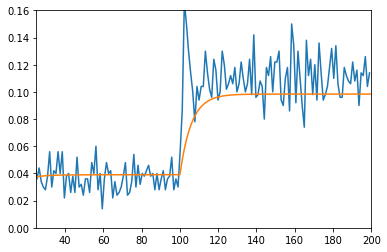

In [ ]:
# plt.plot(t_pop_sim, u_pop_sim)
# plt.ylim([0., 0.16])
# plt.xlim([50, 150])

# r = np.sum(s_pop, axis=1)
# print(r.shape)

window_size = 110

rate = np.empty(population_size)
timing = [0]

cumsum = np.zeros(population_size)
for i in range(len(s_pop[0])):
  if i % window_size == 0:
    rate = np.column_stack((rate, cumsum))
    timing.append(t_pop[i])
    cumsum = np.zeros(population_size).reshape(population_size)
  else:
    cumsum = cumsum + s_pop[:,i].reshape(population_size)

plt.plot(timing, np.mean(rate, axis=0))
plt.plot(t_pop_sim, u_pop_sim)
plt.ylim([0,.16])
plt.xlim([25,200])

